In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df = pd.read_csv('dailykos.csv') 

In [3]:
df.head()

,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,access,...,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0


In [4]:
df.shape

(3430, 1545)

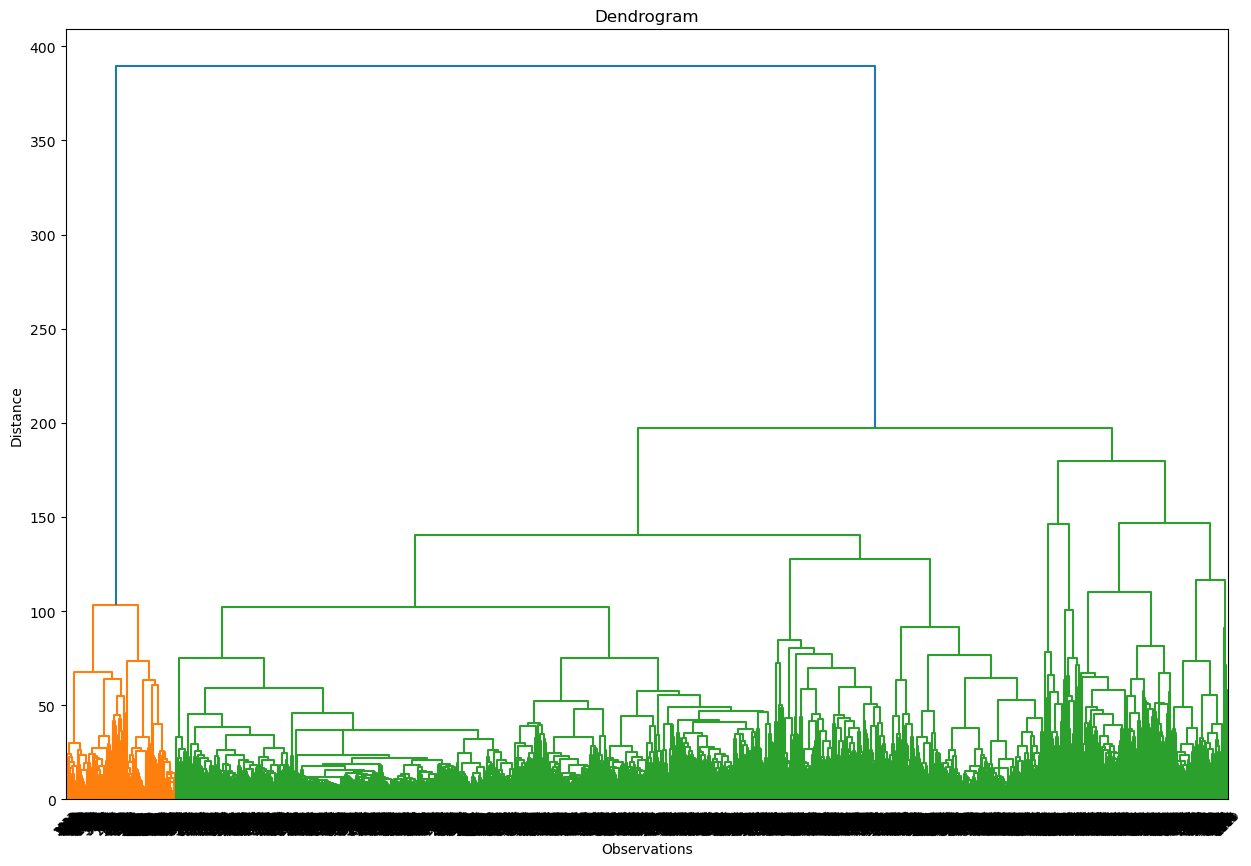

In [5]:
# Compute Euclidean distances
dist = linkage(df, method='ward',metric='euclidean') 
# Create a dendrogram 
plt.figure(figsize=(15, 10))
dendrogram(dist, leaf_font_size=8, leaf_rotation=45)
plt.title('Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
plt.show() 

The dendrogram shows the hierarchical clustering of the observations. The vertical lines show the distances between the clusters. We can see that there are no clear breakpoints in the dendrogram, so it's difficult to choose the number of clusters.

---

<p><h2>In this problem, we are trying to cluster news articles or blog posts into groups. This can be used to show readers categories to choose from when trying to decide what to read. Just thinking about this application, what are good choices for the number of clusters? Explain your thinking.</h2></p>
<p>A.The number of clusters required for text clustering depends on the number of categories present in the news articles. Typically, news articles or blogs can be grouped into topics such as Politics, Business, Education, Entertainment, Sports, Technology, among others. The number of clusters can be determined based on the categories selected for clustering. It is important to select the appropriate number of clusters based on the number of categories that the documents are to be clustered into.</p>

---

### Choosing the number of clusters
### Let’s pick 7 clusters and answer the following questions:

In [6]:
from scipy.cluster.hierarchy import fcluster

# Perform hierarchical clustering with 7 clusters
hc_clusters = fcluster(dist, 7, criterion='maxclust') 

In [7]:
len(hc_clusters) 


3430

In [8]:
print(np.unique(hc_clusters))

[1 2 3 4 5 6 7]


In [9]:
# Create a new DataFrame with the cluster assignments 
df_clusters = pd.DataFrame({'Cluster': hc_clusters}) 
df_clusters = pd.concat([df_clusters, df], axis=1)
df_clusters

,Cluster,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,...,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3426,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3427,2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3428,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
counts = df_clusters['Cluster'].value_counts()
counts

2    1761
3     803
1     324
6     270
7     167
4      55
5      50
Name: Cluster, dtype: int64

### 1 1.	How many observations are in cluster 3?

In [11]:
# Count the number of points assigned to cluster 3
count_cluster_3 = (df_clusters['Cluster'] == 3).sum()
print(count_cluster_3)

803


### 2.	Which cluster has the most observations?

In [12]:
max_cluster = counts.idxmax()
print(max_cluster)

2


###  3.	Which cluster has the fewest observations?

In [13]:
# Get the index of the cluster with the minimum count
min_cluster = counts.idxmin()
print(min_cluster)

5


---

### Question:4-Instead of looking at the average value in each variable individually, we’ll just look at the top 6 words in each cluster.

In [14]:
counts

2    1761
3     803
1     324
6     270
7     167
4      55
5      50
Name: Cluster, dtype: int64

<h3>Compute the mean frequency values of each of the words in cluster 1, and then output the 6 words that occur the most frequently.</h3>

### Cluster 1 

In [15]:
cluster1 = df_clusters[hc_clusters == 1]
mean_freq = cluster1.mean()
top_words = mean_freq.sort_values(ascending=False)[:6] 
top_words.values

array([10.37654321,  4.85185185,  4.37654321,  4.10493827,  2.85802469,
        2.85802469])

<h3>What is the most frequent word in this cluster, in terms of average value?</h3>
<p>Based on the most frequent word, "November," as well as mentions of "poll" and "vote," it is likely that this cluster pertains to an election that is scheduled to take place in November.</p>


In [16]:
#Output of words
num_clusters = 7
var_names = [f"cluster_{i}" for i in range(1, num_clusters+1)]
top_words_df = pd.DataFrame(columns=var_names)
for i in range(1, num_clusters+1):
    cluster = df_clusters[hc_clusters == i]
    mean_freq = cluster.mean()
    top_words = mean_freq.sort_values(ascending=False)[:6]
    top_words_df[var_names[i-1]] = top_words.index.tolist()
top_words_df

,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7
0,november,Cluster,Cluster,dean,democrat,Cluster,kerry
1,poll,bush,poll,kerry,parties,bush,bush
2,vote,democrat,kerry,Cluster,state,iraq,Cluster
3,challenge,kerry,bush,democrat,republican,war,campaign
4,democrat,state,democrat,edward,Cluster,administration,poll
5,bush,presided,republican,candidate,senate,american,presided


In [17]:
#Output of words with frequency
num_clusters = 7
var_names = [f"cluster_{i}" for i in range(1, num_clusters+1)]
top_words_df = pd.DataFrame()
for i in range(1, num_clusters+1):
    cluster = df_clusters[hc_clusters == i]
    mean_freq = cluster.mean()
    top_words = mean_freq.sort_values(ascending=False)[:6]
    cluster_name = var_names[i-1]
    freq_name = f"{var_names[i-1]}_frequency"
    top_words_df[cluster_name] = top_words.index.tolist()
    top_words_df[freq_name] = top_words.values.tolist()
top_words_df


,cluster_1,cluster_1_frequency,cluster_2,cluster_2_frequency,cluster_3,cluster_3_frequency,cluster_4,cluster_4_frequency,cluster_5,cluster_5_frequency,cluster_6,cluster_6_frequency,cluster_7,cluster_7_frequency
0,november,10.376543,Cluster,2.000000,Cluster,3.000000,dean,12.309091,democrat,12.38,Cluster,6.000000,kerry,8.101796
1,poll,4.851852,bush,1.546281,poll,2.429639,kerry,5.345455,parties,6.34,bush,4.777778,bush,7.574850
2,vote,4.376543,democrat,0.659852,kerry,2.012453,Cluster,4.000000,state,5.74,iraq,3.425926,Cluster,7.000000
3,challenge,4.104938,kerry,0.607609,bush,1.922790,democrat,3.545455,republican,5.64,war,2.470370,campaign,1.862275
4,democrat,2.858025,state,0.542873,democrat,1.823163,edward,2.818182,Cluster,5.00,administration,2.225926,poll,1.736527
5,bush,2.858025,presided,0.526973,republican,1.328767,candidate,2.727273,senate,3.30,american,1.633333,presided,1.616766


### Which cluster could best be described as the cluster related to the Iraq war?
<p>Cluster 6 appears to be characterized by the frequent occurrence of words related to Iraq and war. Therefore, it is likely that this cluster represents the Iraq War.</p>

### In 2004, one of the candidates for the Democratic nomination for the President of the United States was Howard Dean, John Kerry was the candidate who won the democratic nomination, and John Edwards with the running mate of John Kerry (the Vice President nominee). Given this information, which cluster best corresponds to the democratic party.
- Cluster 4 is characterized by the presence of the most frequent words "Dean", "Edward", and "Kerry", which implies that this cluster contains important information related to these entities

---

## K means clustering 

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, random_state=1000, n_init=100).fit(df)
clusters = kmeans.predict(df)
clusters = clusters+1

In [19]:
np.unique(clusters)

array([1, 2, 3, 4, 5, 6, 7])

In [20]:
# Create a new DataFrame with the cluster assignments 
df_clusters2 = pd.DataFrame({'kmeans_Cluster': clusters}) 
df_clusters2 = pd.concat([df_clusters2, df], axis=1) 

In [21]:
df_clusters2

,kmeans_Cluster,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,...,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3426,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3427,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3428,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# How many observations are in cluster 3?
print((df_clusters2['kmeans_Cluster'] == 3).sum())

154


In [23]:
# Which cluster has the most observations?
print(df_clusters2['kmeans_Cluster'].value_counts().idxmax())


1


In [24]:
# Which cluster has the fewest observations?
print(df_clusters2['kmeans_Cluster'].value_counts().idxmin())

4


In [25]:
df_clusters2['kmeans_Cluster'].value_counts()

1    1885
5     381
6     332
2     329
7     303
3     154
4      46
Name: kmeans_Cluster, dtype: int64

---

<h3>Now, output the six most frequent words in each cluster, like we did in the previous problem, for each of the k-means clusters.</h3>



In [26]:
# Define the number of clusters
num_clusters = 7
var_names = [f"cluster_{i}" for i in range(1, num_clusters+1)]
top_words_df = pd.DataFrame(columns=var_names)
for i in range(1, num_clusters+1):
    cluster = df_clusters2[clusters == i]
    mean_freq = cluster.mean()
    top_words = mean_freq.sort_values(ascending=False)[:6]
    top_words_df[var_names[i-1]] = top_words.index.tolist()
top_words_df

,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7
0,bush,november,dean,democrat,kmeans_Cluster,kmeans_Cluster,bush
1,kmeans_Cluster,poll,kerry,parties,democrat,bush,kmeans_Cluster
2,kerry,vote,clark,republican,republican,iraq,kerry
3,poll,challenge,kmeans_Cluster,state,elect,war,poll
4,democrat,bush,edward,seat,state,administration,presided
5,general,democrat,democrat,kmeans_Cluster,senate,american,democrat


<h3>Which k-means cluster best corresponds to the Iraq War?</h3>

The Cluster 6 contains the words 'Iran' and 'war', indicating that it provides information related to these topics. Therefore, we can conclude that the <b>Cluster 6</b> effectively describes these topics.

<h3>Which k-means cluster best corresponds to the democratic party? (Remember that we are looking for the names of the key democratic party leaders.)</h3>
<p>Based on the above dataframe, it can be observed that <b>Cluster 3</b> is associated with the occurrence of highly frequent words such as `"Dean", "Edward", and "Kerry"`. This suggests that this particular cluster contains significant information related to these entities.</p>


### Cross tab

In [27]:
import pandas as pd 
# Create a DataFrame with the cluster assignments for each method
df = pd.DataFrame({ 'HC Cluster': hc_clusters, 'K-Means Cluster': df_clusters2['kmeans_Cluster']})
# Create the cross-tabulation table 
pd.crosstab(df['HC Cluster'], df['K-Means Cluster']) 

K-Means Cluster,1,2,3,4,5,6,7
HC Cluster,,,,,,,
1,0,324,0,0,0,0,0
2,1477,0,3,0,102,122,57
3,352,1,91,8,256,6,89
4,0,0,54,1,0,0,0
5,0,1,0,36,8,1,4
6,18,0,0,1,10,197,44
7,38,3,6,0,5,6,109


<h3>Which Hierarchical Cluster best corresponds to K-Means Cluster 2?</h3>
<p>Ans.The Hierarchical Cluster 1 correspord to K-mean cluster 2 as they share highest number of data instances which is 324. 

<h3>Which Hierarchical Cluster best corresponds to K-Means Cluster 3?</h3>
<p>Ans.The Hierarchical Cluster 3 correspord to K-mean cluster 3 as they share highest number of data instances which is 91.